In [8]:
import numpy as np
import scipy as sci
import random
import itertools
import ROOT

Welcome to JupyROOT 6.30/02


In [57]:
#Building the deck
class Card:
    def __init__(self, value, suit, count, card_id, order):
        self.value = value
        self.suit = suit
        self.count = count
        self.card_id = card_id
        self.order = order

class Deck:
    def __init__(self):
        self.suits = ['heart', 'diamonds', 'spades', 'clubs']
        self.values = ['ace', '2', '3', '4', '5', '6', '7', '8', '9', '10', 'jack', 'queen', 'king']
        self.counts = [1,2,3,4,5,6,7,8,9,10,10,10,10]
        self.orders = [1,2,3,4,5,6,7,8,9,10,11,12,13]
        
        counter = 0
        self.deck = []
        
        for i, value in enumerate(self.values):
            for suit in self.suits:
                self.deck.append(Card(value, suit, self.counts[i], counter, self.orders[i]))
                counter += 1
        
        
        #self.deck = [Card(value, suit, self.counts[i], self.card_ids) for i, value in enumerate(self.values) for suit in self.suits]
    
    def value_to_order(self, value):
        index = self.values.index(value)
        return self.orders[index]
    
    def value_to_count(self, value):
        index = self.values.index(value)
        return self.counts[index]
    
    def iPrint_deck(self):
        for card in self.deck:
            print(card.value, card.suit, card.count, card.card_id, card.order)
            
class Hand:
    def __init__(self, input_deck, hand_size=5):
        self.input_deck = input_deck
        self.hand_size = hand_size
        self.hand, self.output_deck = self.hand_maker()
        self.hand = self.sorter() #Organize the cards
    
    def hand_maker(self):
        hand = []
        i = 0
        while i < self.hand_size:
            index = random.randint(0,len(self.input_deck.deck)-1)
            current_card = self.input_deck.deck[index]
            self.input_deck.deck.pop(index)
            hand.append(current_card)
            i+=1
        return hand, self.input_deck #Note that the deck has the proper number of cards removed.
    
    #For sorting the cards in terms of card order
    def sorter(self):
        return sorted(self.hand, key=lambda card: card.order, reverse=False)
    
    def iPrint_hand(self):
        for card in self.hand:
            print(card.value, card.suit, card.count, card.card_id, card.order)
            
    def iPrint_output_deck(self):
        for card in self.output_deck.deck:
            print(card.value, card.suit, card.count, card.card_id, card.order)

#I want to be able to choose all the cards that can go into the hand
#I want the input to be [[suit, value], [suit, value], [suit, value], [suit, value], [suit, value]]
class testHand:
    def __init__(self, input_deck, selected_hand):
        self.input_deck = input_deck
        self.hand = self.hand_maker(selected_hand)
        self.hand = self.sorter()
        
    def hand_maker(self, selected_hand):
        hand = []
        for i, selCard in enumerate(selected_hand):
            hand.append(Card(selCard[1], selCard[0], self.input_deck.value_to_count(selCard[1]), i, self.input_deck.value_to_order(selCard[1])))
        return hand
    
    #For sorting the cards in terms of card order
    def sorter(self):
        return sorted(self.hand, key=lambda card: card.order, reverse=False)
    
    def iPrint_hand(self):
        for card in self.hand:
            print(card.value, card.suit, card.count, card.card_id, card.order)
            
    def iPrint_output_deck(self):
        for card in self.output_deck.deck:
            print(card.value, card.suit, card.count, card.card_id, card.order)
    

class Counter:
    def __init__(self, hand, deck, PRINT=False):
        self.hand = hand
        self.deck = deck
        self.points = 0
        self.value_repeats = self.repeat_finder()
        
        self.multiple_points = self.multiples()
        self.run_points = self.runs()
        self.fifteen_points = self.fifteens()
        self.flush_points = self.flush()
        self.points = self.multiple_points + self.run_points + self.fifteen_points + self.flush_points
        
        if PRINT:
            print("\nPoints from multiples:")
            print(self.multiple_points, "\n")
            print("\nPoints from runs:")
            print(self.run_points, "\n")
            print("\nPoints from fifteens:")
            print(self.fifteen_points, "\n")
            print("\nPoints from flushes:")
            print(self.flush_points, "\n")
            print("\nTotal points:")
            print(self.points, "\n")
    
    #To find which card values are repeated and how many in the hand are repeated
    def repeat_finder(self):
        value_repeats = {}
        for value in self.deck.values:
            for card in self.hand.hand:
                if value==card.value:
                    if value not in value_repeats.keys():
                        value_repeats[value] = 1
                    else:
                        value_repeats[value] += 1
        return value_repeats
    
    #Determines the points from multiples of a card
    def multiples(self):
        multiple_points = 0
        for key in self.value_repeats.keys():
            multiple=self.value_repeats[key]
            if multiple==2:
                multiple_points += 2
            elif multiple==3:
                multiple_points += 6  
            elif multiple==4:
                multiple_points += 12    
            else:
                continue
        return multiple_points
    
    #Determines the presence of runes in a hand
    def runs(self):
        run_points = 0
        run_storage = {}
        repeat_keys = list(self.value_repeats.keys())
        for i, key in enumerate(repeat_keys):            
            if i+1 >= len(repeat_keys):
                if len(run_storage)>0 and self.deck.value_to_order(list(run_storage.keys())[-1]) == self.deck.value_to_order(key)-1:
                    run_storage[key] = self.value_repeats[key]
                else:
                    continue
            elif self.deck.value_to_order(repeat_keys[i+1]) == self.deck.value_to_order(key)+1:
                run_storage[key] = self.value_repeats[key]
                
            elif len(run_storage)>0 and (self.deck.value_to_order(repeat_keys[i+1]) != self.deck.value_to_order(key)+1) and self.deck.value_to_order(list(run_storage.keys())[-1]) == self.deck.value_to_order(key)-1:
                run_storage[key] = self.value_repeats[key]
                if len(run_storage) < 3:
                    run_storage = {}
            #print(run_storage)   
            #print(self.deck.value_to_order(list(run_storage.keys())[-1]), self.deck.value_to_order(key)-1)
         
        if len(run_storage.keys())<3:
            pass       
        elif all(value == 1 for value in run_storage.values()):
            run_points += len(run_storage.keys())
        else:
            multiple = 1
            for j in run_storage.values():
                multiple *= j
            run_points += len(run_storage.keys())*multiple   
        
        self.run_storage = run_storage
        return run_points
        
    #Determines the presence of fifteens in a hand
    def fifteens(self):
        permutations = list(itertools.permutations(self.hand.hand))
        
        fifteen_points = 0
        fifteen_storage = []
        for perm in permutations:
            count = 0
            temp_storage = []
            for card in perm:
                count += card.count
                temp_storage.append(card)
                if count == 15:
                    sorted_temp_storage = sorted(temp_storage, key=id)
                    if sorted_temp_storage in fifteen_storage:
                        continue
                    else:
                        fifteen_storage.append(sorted_temp_storage)
                        fifteen_points += 2
                    break
                elif count > 15:
                    break
        
        return fifteen_points
    
    #Determines if you have 4+ of a suit in your hand
    def flush(self):
        flush_points = 0
        flush_storage = {}
        for suit in self.deck.suits:
            count = 0
            for card in self.hand.hand:
                if card.suit == suit:
                    count += 1
            if count >= 4:
                flush_storage[suit] = count
                
        for key in flush_storage.keys():
            flush_points += flush_storage[key]
            
        return flush_points

In [58]:
#For running the functions
print("\nGenerating initial deck...")
deck = Deck()

print("\nGenerating hand...")
#hand = Hand(deck)
hand = testHand(deck, [['hearts', '5'], ['spades', '5'], ['spades', 'jack'], ['diamonds', '5'], ['hearts', 'jack']])
print("\nMy hand:")
print(hand.iPrint_hand())

counter = Counter(hand, deck, PRINT=True)



Generating initial deck...

Generating hand...

My hand:
5 hearts 5 0 5
5 spades 5 1 5
5 diamonds 5 3 5
jack spades 10 2 11
jack hearts 10 4 11
None

Points from multiples:
8 


Points from runs:
0 


Points from fifteens:
14 


Points from flushes:
0 


Total points:
22 



{'3': 2, '4': 1, '5': 1, '6': 1}
{'4': 1, '5': 2, '6': 1, '7': 1}
{'7': 2, '8': 1, '9': 1, '10': 1}
{'3': 2, '4': 1, '5': 1, '6': 1}
{'2': 1, '3': 2, '4': 1, '5': 1}
{'9': 2, '10': 1, 'jack': 1, 'queen': 1}
{'7': 1, '8': 2, '9': 1, '10': 1}
{'5': 1, '6': 1, '7': 2, '8': 1}
{'4': 1, '5': 1, '6': 2, '7': 1}
{'4': 1, '5': 1, '6': 2, '7': 1}
{'10': 2, 'jack': 1, 'queen': 1, 'king': 1}
{'5': 2, '6': 1, '7': 1, '8': 1}
{'5': 1, '6': 1, '7': 2, '8': 1}
{'5': 1, '6': 1, '7': 2, '8': 1}
{'3': 1, '4': 1, '5': 2, '6': 1}
{'5': 2, '6': 1, '7': 1, '8': 1}
{'2': 1, '3': 1, '4': 2, '5': 1}
{'10': 2, 'jack': 1, 'queen': 1, 'king': 1}
{'3': 2, '4': 1, '5': 1, '6': 1}
{'4': 1, '5': 1, '6': 2, '7': 1}
{'10': 1, 'jack': 1, 'queen': 2, 'king': 1}
{'6': 2, '7': 1, '8': 1, '9': 1}
{'ace': 2, '2': 1, '3': 1, '4': 1}
{'10': 1, 'jack': 2, 'queen': 1, 'king': 1}
{'9': 1, '10': 1, 'jack': 2, 'queen': 1}
{'10': 1, 'jack': 1, 'queen': 2, 'king': 1}
{'7': 2, '8': 1, '9': 1, '10': 1}
{'7': 2, '8': 1, '9': 1, '10': 1}

Warning in <TROOT::Append>: Replacing existing TH1: multiples_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: runs_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: fifteens_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: flush_hist (Potential memory leak).
Warning in <TROOT::Append>: Replacing existing TH1: total_points_hist (Potential memory leak).
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c2
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c3
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c4
Warning in <TCanvas::Constructor>: Deleting canvas with same name: c5


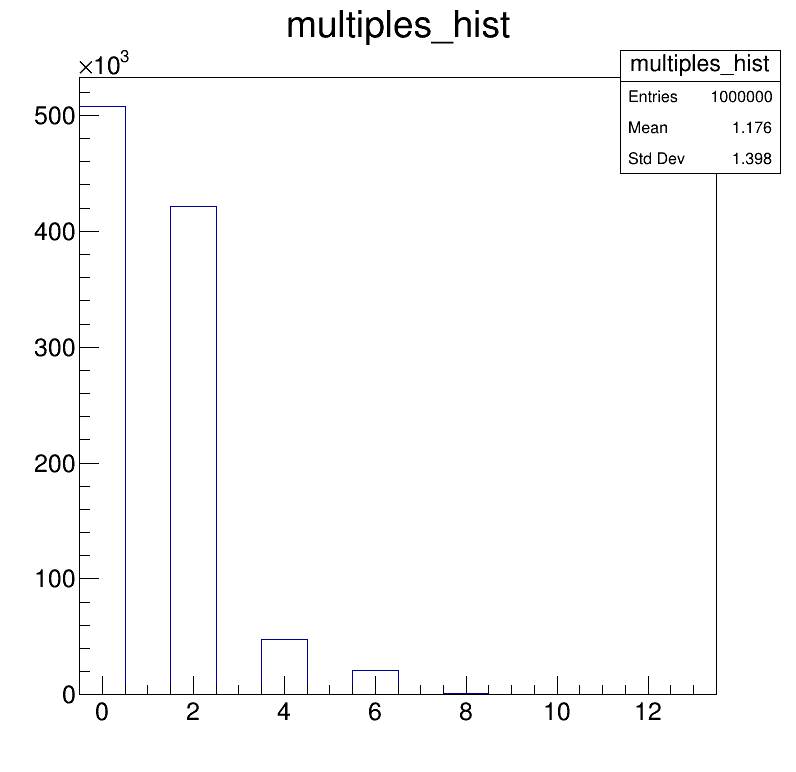

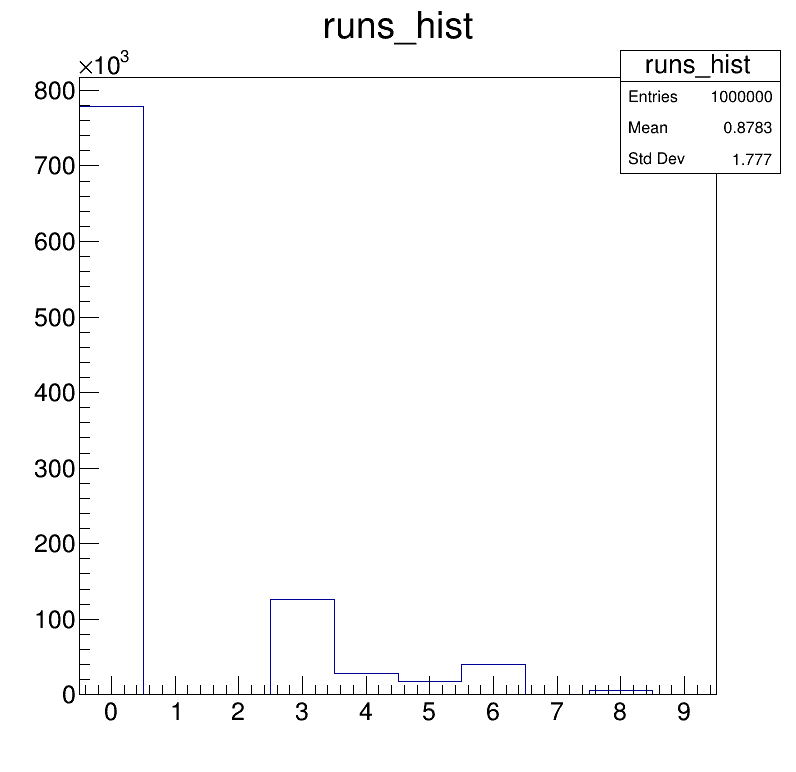

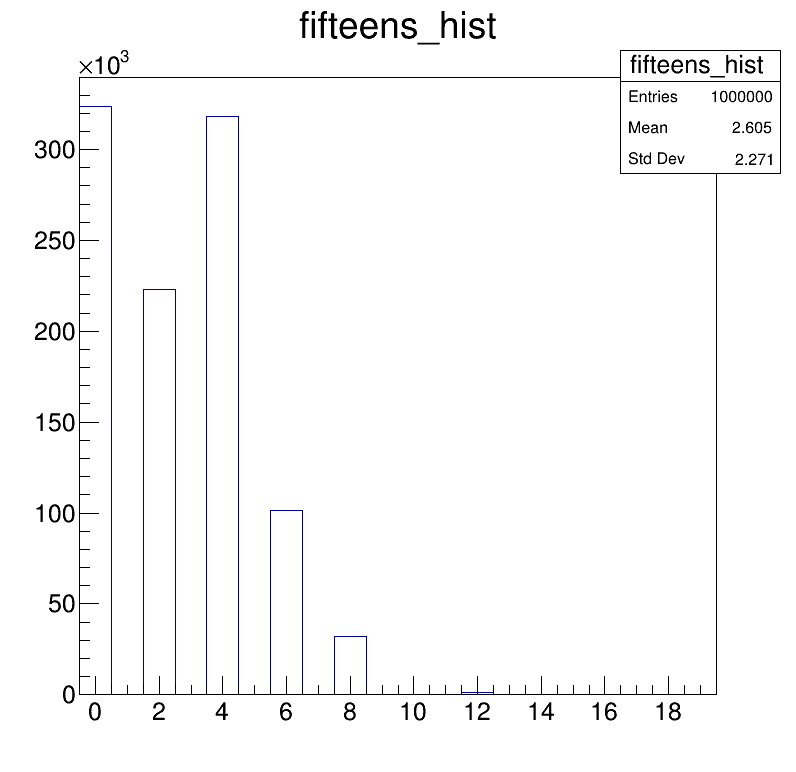

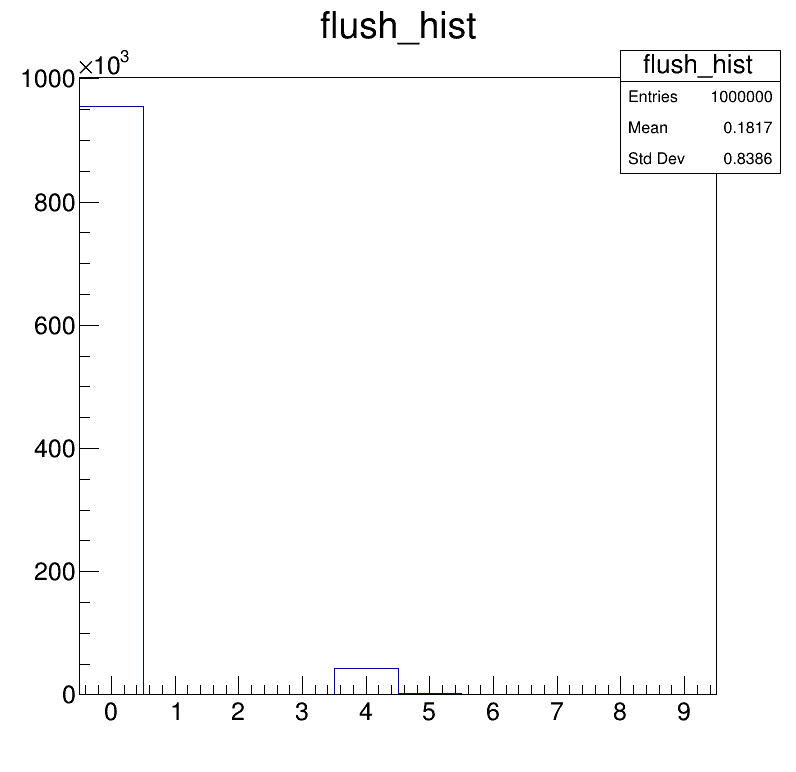

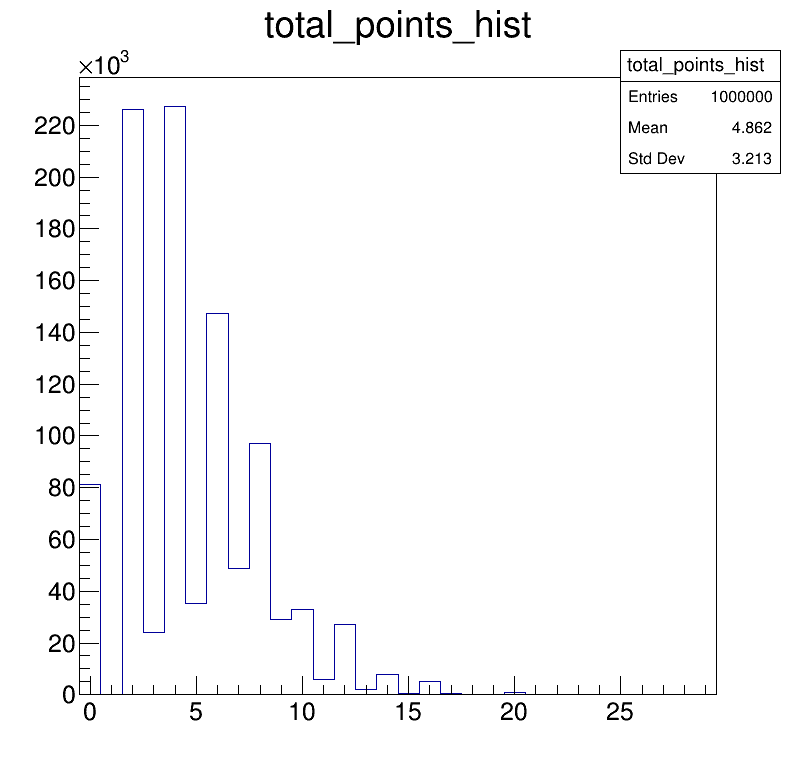

In [59]:
#I want to iterate over a huge amount of hands and see the distribution of points for randomly dealt hands of 5
multiples_hist = ROOT.TH1F("multiples_hist", "multiples_hist", 14, -0.5, 13.5)
runs_hist = ROOT.TH1F("runs_hist", "runs_hist", 10, -0.5, 9.5)
fifteens_hist = ROOT.TH1F("fifteens_hist", "fifteens_hist", 20, -0.5, 19.5)
flush_hist = ROOT.TH1F("flush_hist", "flush_hist", 10, -0.5, 9.5)
total_points_hist = ROOT.TH1F("total_points_hist", "total_points_hist", 30, -0.5, 29.5)

num_hands = 1000000
for i in range(num_hands):
    deck = Deck()
    hand = Hand(deck)
    counter = Counter(hand, deck)
    
    multiples_hist.Fill(counter.multiple_points)
    runs_hist.Fill(counter.run_points)
    fifteens_hist.Fill(counter.fifteen_points)
    flush_hist.Fill(counter.flush_points)
    total_points_hist.Fill(counter.points)
    
c1 = ROOT.TCanvas("c1", "c1", 800, 800)
multiples_hist.Draw()
c1.Draw()

c2 = ROOT.TCanvas("c2", "c2", 800, 800)
runs_hist.Draw()
c2.Draw()

c3 = ROOT.TCanvas("c3", "c3", 800, 800)
fifteens_hist.Draw()
c3.Draw()

c4 = ROOT.TCanvas("c4", "c4", 800, 800)
flush_hist.Draw()
c4.Draw()

c5 = ROOT.TCanvas("c5", "c5", 800, 800)
total_points_hist.Draw()
c5.Draw()